In [25]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
        header=None)
df_wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y)
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

cov_mat = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_mat)

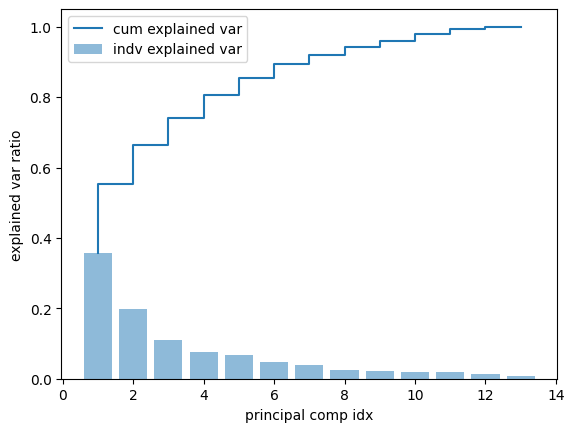

In [44]:
tot = sum(eigen_val)
var_exp = [lamda/tot for lamda in sorted(eigen_val, reverse=True)]
cum_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='indv explained var')
plt.step(range(1, 14), cum_exp, label='cum explained var')
plt.xlabel('principal comp idx')
plt.ylabel('explained var ratio')
plt.legend(loc='best')
plt.show()
